Epoch 1/200
24/24 [==============================] - 1s 18ms/step - loss: 0.6972 - accuracy: 0.4997 - val_loss: 0.6914 - val_accuracy: 0.7055
Epoch 2/200
24/24 [==============================] - 0s 2ms/step - loss: 0.6930 - accuracy: 0.5112 - val_loss: 0.6888 - val_accuracy: 0.6712
Epoch 3/200
24/24 [==============================] - 0s 2ms/step - loss: 0.6869 - accuracy: 0.5793 - val_loss: 0.6863 - val_accuracy: 0.6096
Epoch 4/200
24/24 [==============================] - 0s 2ms/step - loss: 0.6836 - accuracy: 0.5884 - val_loss: 0.6837 - val_accuracy: 0.5685
Epoch 5/200
24/24 [==============================] - 0s 3ms/step - loss: 0.6851 - accuracy: 0.5673 - val_loss: 0.6809 - val_accuracy: 0.5479
Epoch 6/200
24/24 [==============================] - 0s 2ms/step - loss: 0.6803 - accuracy: 0.5817 - val_loss: 0.6773 - val_accuracy: 0.6301
Epoch 7/200
24/24 [==============================] - 0s 2ms/step - loss: 0.6775 - accuracy: 0.6182 - val_loss: 0.6737 - val_accuracy: 0.6712
Epoch 8/200


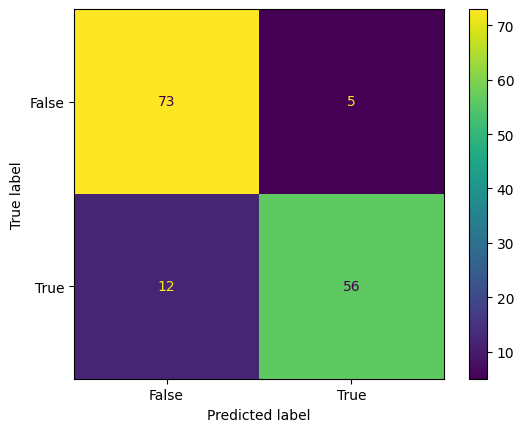

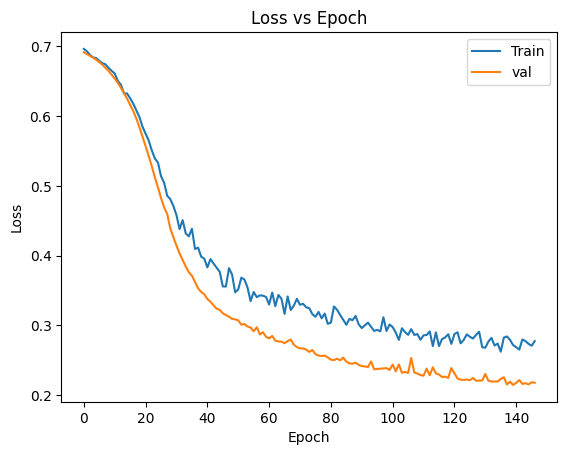

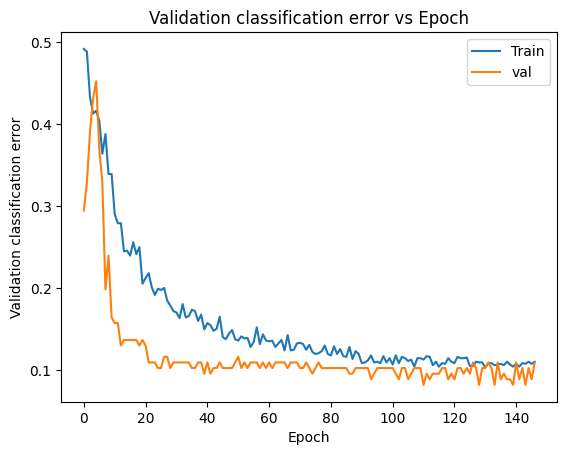

In [74]:
import tensorflow as tf
from tensorflow.keras import regularizers
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.layers import Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
df = pd.read_csv("housepricedata.csv")
# df.head(7)
dataset = df.values
X = dataset[:,:10]
Y = dataset[:,10]
min_max_scaler = MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.2)
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test,Y_val_and_test, test_size= 0.5)
class neural_network:
    def __init__(self,X_va, X_tra,Y_va,Y_tra,lay,uni,act,bat_siz,epo,learn_rate,l):
        self.network = Sequential()
        self.network.add(Dense(units=uni, activation=act, input_dim = 10,activity_regularizer=regularizers.l1(l) ))
        for i in range(lay):
            self.network.add(Dense(units=uni, activation=act,kernel_initializer = 'glorot_uniform',activity_regularizer=regularizers.l1(l)))
            self.network.add(Dropout(0.34))
        self.network.add(Dense(units=1, activation='sigmoid',activity_regularizer=regularizers.l1(l)))
        SD = tf.keras.optimizers.SGD(learning_rate=learn_rate,momentum=0.5, lr = 0.009)
        es = EarlyStopping(
            monitor= 'val_loss',
            patience = 7,
            verbose = 1,
            mode = 'min'
        )
        self.network.compile(optimizer=SD, loss='binary_crossentropy', metrics=['accuracy'])
        self.histo = self.network.fit(X_tra, Y_tra,callbacks = [es],verbose = 1, batch_size=bat_siz, epochs=epo,validation_data =(X_va, Y_va))
networ = neural_network(X_val,X_train,Y_val,Y_train,2,30,'relu',50,200,0.02,2*10**-4)
# ak = []
# for j in range(7):
#     k2 = networ.network.evaluate(X_val,Y_val)[1]
#     ak.append(k2)
# plt.plot(ak)
# plt.title("Validation accuracy vs size of hidden layer)")
# plt.xlabel("size of hidden layer(x15)")
# plt.ylabel("accuracy on validation data")
# plt.show()
# print("sdhsbdjkan")
print(networ.network.evaluate(X_test,Y_test)[1])
prediction = networ.network.predict(X_test)
prediction = [1 if y>=0.5 else 0 for y in prediction]
cm = confusion_matrix(Y_test,prediction)
cmdi = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[False,True])
cmdi.plot()
plt.show()
# prediction
plt.plot(networ.histo.history['loss'])
plt.plot(networ.histo.history['val_loss'])
plt.title("Loss vs Epoch")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(["Train","val"], loc = "upper right")
plt.show()
km1 = networ.histo.history['accuracy']
km2 = networ.histo.history['val_accuracy']
for i in range(len(km1)):
    km1[i] = 1-km1[i]
for i in range(len(km2)):
    km2[i] = 1-km2[i]
plt.plot(km1)
plt.plot(km2)
plt.title("Validation classification error vs Epoch")
plt.xlabel("Epoch")
plt.ylabel("Validation classification error")
plt.legend(["Train","val"], loc = "upper right")
plt.show()